## Feature Selection : Genetic Algorithm and Boruta

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from src import FeatureBuilder
import random
from sklearn import metrics
import matplotlib.pyplot as plt
import time
from src.data import DataLoader
from src.features.features_selection import FeatureSelector
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
import seaborn as sns
from boruta.boruta import BorutaPy
from src.visualization.visualize import plot_feature_importance

In [2]:
# Data Loading
loader = DataLoader.DataLoader()
loader.load_all()
featureBuilder = FeatureBuilder.FeatureBuilder(loader)
featureBuilder.create_all_features()
dataset = featureBuilder.MasterTable
dataset = dataset[dataset.DATA_PART == 'train'].drop(['DATA_PART'], axis=1)

### Genetic Algorithm

###### First set of parameters 

In [ ]:
PARAMETERS = {'OPTIMISATION' : {'POPULATION_SIZE': 30, 'P_CROSSOVER': 0.9, 'P_MUTATION': 0.1, 'MAX_GENERATIONS': 10,
                 'HALL_OF_FAME_SIZE': 2, 'FEATURE_PENALTY_FACTOR': 0.001, 'RANDOM_SEED': 13,
                 'TOURNAMENT_SIZE': 2, 'MUTATION_FLIP': 1},
                 'MODEL' : {'max_depth': 15,'n_estimators': 20,'n_jobs': 20,'verbose': False},
                 'CROSS_VALIDATION_FOLDS' : 3}

In [ ]:
selector = FeatureSelector.LoanFeatureSelector(parameters = PARAMETERS)

gen	nevals	max     	avg     
0  	30    	0.645426	0.618185
1  	28    	0.646725	0.627041
2  	28    	0.651655	0.635712
3  	27    	0.651655	0.642479
4  	23    	0.651782	0.646565
5  	26    	0.65684 	0.649009
6  	26    	0.657182	0.651741
7  	24    	0.659369	0.654371
8  	23    	0.660269	0.655494
9  	23    	0.661224	0.656481
10 	26    	0.661461	0.6575  
- Best solutions are:
0 :  [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0] , fitness =  0.6614606840524485 , accuracy =  0.7179094550896156 , features =  58
1 :  [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

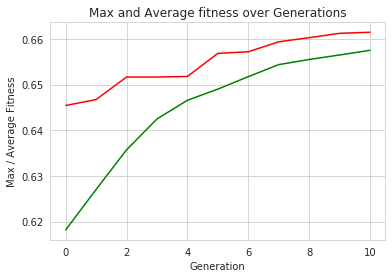

--- 2096.3814010620117 seconds ---


In [3]:
start_time = time.time()
selector.find_optimal_features(visualize=True)
print("--- %s seconds ---" % (time.time() - start_time))

In [31]:
print("Number original features %d , after feature selection it became %d" % (len(selector.loan.features),len(selector.best_features)))

Number original features 154 , after feature selection it became 58


In [123]:
X = dataset[selector.best_features].values
y = dataset.TARGET
model_rf = RandomForestClassifier(n_estimators=200, n_jobs=20, max_depth=20)
Model_ev = cross_val_score(model_rf, X, y, cv=5, scoring='roc_auc')
print("Estimated Model Auc performance on unseen data %a" % (Model_ev.mean().round(3)))

Estimated Model Auc performance on unseen data 0.733


###### Second set of parameters 

In [2]:
PARAMETERS = {'OPTIMISATION' : {'POPULATION_SIZE': 30, 'P_CROSSOVER': 0.8, 'P_MUTATION': 0.2, 'MAX_GENERATIONS': 10,
                 'HALL_OF_FAME_SIZE': 4, 'FEATURE_PENALTY_FACTOR': 0, 'RANDOM_SEED': 13,
                 'TOURNAMENT_SIZE': 3, 'MUTATION_FLIP': 1},
                 'MODEL' : {'max_depth': 10,'n_estimators': 75,'n_jobs': 25,'verbose': False, 'class_weight' : 'balanced'},
                 'CROSS_VALIDATION_FOLDS' : 2}

In [3]:
selector = FeatureSelector.LoanFeatureSelector(parameters = PARAMETERS)

gen	nevals	max     	avg     
0  	30    	0.742302	0.714009
1  	24    	0.74278 	0.729635
2  	20    	0.743405	0.74074 
3  	22    	0.743975	0.742443
4  	20    	0.743975	0.742503
5  	22    	0.744325	0.742765
6  	24    	0.74474 	0.74334 
7  	26    	0.745162	0.743579
8  	21    	0.745162	0.744255
9  	20    	0.745162	0.744419
10 	22    	0.745641	0.744599
- Best solutions are:
0 :  [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1] , fitness =  0.7456413699726624 , accuracy =  0.7436790944318992 , features =  82
1 :  [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

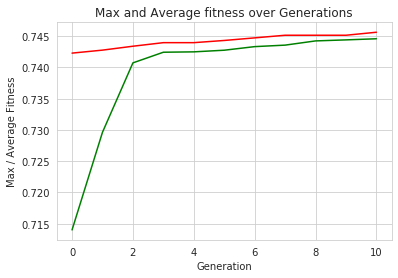

--- 2332.6289558410645 seconds ---


In [94]:
start_time = time.time()
selector.find_optimal_features(visualize=True)
print("--- %s seconds ---" % (time.time() - start_time))

In [13]:
print("Number original features %d , after feature selection it became %d" % (len(selector.loan.features),len(selector.best_features)))

Number original features 154 , after feature selection it became 82


In [31]:
X = dataset[selector.best_features].values
y = dataset.TARGET
model_rf = RandomForestClassifier(n_estimators=400, n_jobs=20, max_depth=10)
Model_ev = cross_val_score(model_rf, X, y, cv=5, scoring='roc_auc')
print("Estimated Model Auc performance on unseen data %a" % (Model_ev.mean().round(3)))

Estimated Model Auc performance on unseen data 0.749


###### In the second iteration we have 82 selected feature vs 58 in the first one due to FEATURE_PENALTY_FACTOR = 0

### Boruta Feature selector

In [3]:
FS_PARAMETERS = {'MODEL' : {'max_depth': 5,'n_jobs': -1,'verbose': False}}

In [4]:
selector = FeatureSelector.LoanFeatureSelector(method = 'boruta', parameters = FS_PARAMETERS)

In [5]:
start_time = time.time()
selector.find_optimal_features()
print("--- %s seconds ---" % (time.time() - start_time))

--- 664.6658353805542 seconds ---


In [8]:
print("Number original features %d , after feature selection it became %d" % (len(selector.loan.features),len(selector.best_features)))

Number original features 154 , after feature selection it became 98


In [6]:
selector.evaluate_best_features()

Estimated Model Auc performance on unseen data 0.748


#### Comparing GA vs BORUTA 
    
- GA selected 82 feature vs 98 for Boruta
- Similar auc performance for both set of features.
- GA needs more hyperparameter setting than BORUTA making it difficult to find the best solution quickly
- BORUTA spent 11 minutes vs 38 minutes for GA --> GA is expensive computationaly.

###### Based on Performance/Cost trade off , we will choose BORUTA algorithm in selecting features for the current moment.  

In [13]:
model = RandomForestClassifier(n_estimators=400, n_jobs=-1, max_depth=20)
model.fit(dataset[selector.best_features].values, dataset.TARGET)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

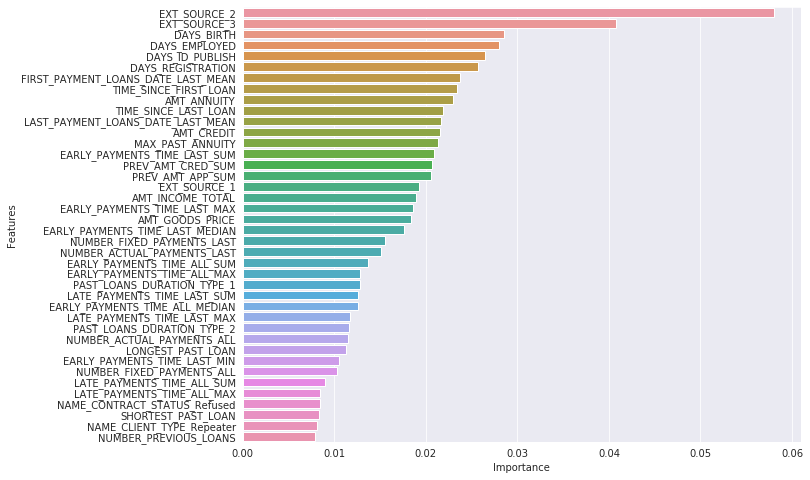

In [17]:
plot_feature_importance(selector.best_features, model, 40)

#### Analysing Feature Importance Graph

The top features are ranked as follow : 
- EXT_SOURCE : features provided by the competition hosts
- Time features describing client : age, time since employment
- Time features describing client past loans : time since first loan, time since last loan.
- Features describing amount of money payed in past loans
- Time Features describing if the client payed his past payments on time, late, or early

we can conclude that client past loan payments are the most important data and especially time features wich is logical because:

- Patterns of loan default will exist in defaulters past loans payments since it is same experiment (loan), different conditions (past vs futur).
- Time features related to payments are important since a default is failture to pay a loan in a fixed TIME  period.

In [ ]:
# Score on kaggle until now 0.74224